# 一、绘制png：MolDraw2DCairo
* 首先，创建一个Cairo drawer：Chem.Draw.rdMolDraw2D.MolDraw2DCairo(arg1, arg2)，同Chem.Draw.MolDraw2DCairo(arg1, arg2)
arg1和arg2分别是绘制图像的长和宽
* 接着，准备待绘制的分子：PrepareMolForDrawing(mol, kekulize=True ,addChiralHs=True, wedgeBonds=True, forceCoords=False)
为了画出更好看的分子，需要进行一些预处理。可以处理的选项有：计算凯库勒式、手性中心补氢、手性中心添加楔形键、生成2D坐标
* 开始绘制：DrawMolecule()
* 结束绘制：FinishDrawing()
* 输出结果：WriteDrawingText(file_name)

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import Image

In [2]:
mol = Chem.MolFromSmiles('[H][C@](C)(O)F')
d = rdMolDraw2D.MolDraw2DCairo(400, 200)
tmp = rdMolDraw2D.PrepareMolForDrawing(mol)
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('data/rdMolDraw2D_1.png')

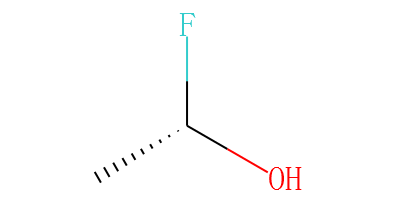

In [3]:
Image(filename = 'data/rdMolDraw2D_1.png', width=250)

# 二、绘制svg：MolDraw2DSVG
* 首先，创建一个svg drawer：Chem.Draw.rdMolDraw2D.MolDraw2DSVG(arg1, arg2)，同Chem.Draw.MolDraw2DSVG(arg1, arg2)
arg1和arg2分别是绘制图像的长和宽
* 接着，准备并绘制分子，两个步骤合二为一：PrepareAndDrawMolecule(drawer, mol, ...)
* 结束绘制：FinishDrawing()
* 获取结果：GetDrawingText(file_name)

In [4]:
mol = Chem.MolFromSmiles('c1ccccc1')
d = rdMolDraw2D.MolDraw2DSVG(150, 150)
rdMolDraw2D.PrepareAndDrawMolecule(d, mol)
d.FinishDrawing()
svg = d.GetDrawingText()
with open('data/rdMolDraw2D_2.svg', 'w') as f:
    f.write(svg)

![title](data/rdMolDraw2D_2.svg)

# 三、绘制设置(svg设置类似)
* 实例化一个参数器：do = rdMolDraw2D.MolDrawOptions()
* 将分子键的宽度设置为4：do.bondLineWidth = 4
* 将分子键的长度设置为30：do.fixedBondLength = 30
* 将分子顺时针旋转30度：do.rotate = 30
* 修改原子标签：do.atomLabels[2] = 'OH group'
* 应用设置：SetDrawOptions(do)

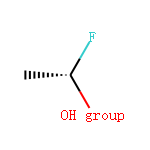

In [5]:
m = Chem.MolFromSmiles('[H][C@](C)(O)F')
d = rdMolDraw2D.MolDraw2DCairo(150, 150)
do = rdMolDraw2D.MolDrawOptions()
do.bondLineWidth = 4
do.fixedBondLength = 30
do.rotate = 30
do.atomLabels[2] = 'OH group'
d.SetDrawOptions(do)
rdMolDraw2D.PrepareAndDrawMolecule(d, m)
d.FinishDrawing()
d.WriteDrawingText('data/rdMolDraw2D_3.png')
Image(filename='data/rdMolDraw2D_3.png', width=250)

# 参考：
https://github.com/Yosuyo/canvas_server/blob/master/structure.py

In [ ]:
def createImage(smiles):
    from rdkit import Chem
    from rdkit.Chem import rdDepictor
    from rdkit.Chem.Draw import rdMolDraw2D
    from rdkit.Chem.Draw.MolDrawing import DrawingOptions

    mol = Chem.MolFromSmiles(smiles)  # Penicillin
    rdDepictor.Compute2DCoords(mol)  # for generating conformer ID
    # create a drawer container
    drawer = rdMolDraw2D.MolDraw2DSVG(300, 300)
    # define drawer options
    drawer.drawOptions().updateAtomPalette({k: (0, 0, 0) for k in DrawingOptions.elemDict.keys()})
    drawer.SetLineWidth(2)
    drawer.SetFontSize(1.0)
    #
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    # generate and write the svg strings
    svg = drawer.GetDrawingText().replace('svg:', '')
    with open("static/images/svgs/"+smiles+".svg", "w") as f:
        f.write(svg)

def createImageHighlight(smiles, smarts):
    from rdkit import Chem
    from rdkit.Chem import AllChem
    from rdkit.Chem import rdDepictor
    from rdkit.Chem.Draw import rdMolDraw2D
    from rdkit.Chem.Draw.MolDrawing import DrawingOptions

    mol = Chem.MolFromSmiles(smiles)
    patt = Chem.MolFromSmarts(smarts)
    hitatoms = mol.GetSubstructMatches(patt) #反応部位のアトムインデックス
    hitatomslist = []
    for x in hitatoms:
        hitatomslist += x
    hitatomsSum = tuple(hitatomslist)
    tm = rdMolDraw2D.PrepareMolForDrawing(mol)
    rdDepictor.Compute2DCoords(mol)  # for generating conformer ID
    # create a drawer container
    drawer = rdMolDraw2D.MolDraw2DSVG(300, 300)
    # define drawer options
    drawer.drawOptions().updateAtomPalette({k: (0, 0, 0) for k in DrawingOptions.elemDict.keys()})
    drawer.SetLineWidth(2)
    drawer.SetFontSize(1.0)
    drawer.drawOptions().setHighlightColour((0.95,0.7,0.95)) #ハイライトの色指定
    drawer.DrawMolecule(tm, highlightAtoms=hitatomsSum)
    drawer.FinishDrawing()
    # generate and write the svg strings
    svg = drawer.GetDrawingText().replace('svg:', '')
    with open("static/images/svgs/"+smiles+"_"+smarts+".svg", "w") as f:
        f.write(svg)